In [6]:
#Pregunta 1:Extracción de datos de acciones de Tesla utilizando yfinance
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Descarga TESLA DATOS
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
print("Tesla Stock Data:")
display(tesla_data.head())

Tesla Stock Data:


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [7]:
#Pregunta 2: Extracción de datos de ingresos de Tesla utilizando Webscraping
import requests
from bs4 import BeautifulSoup

url = 'https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue'

headers = {
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.9',
    'Referer': 'https://www.google.com/'
}

response = requests.get(url, headers=headers)

if response.status_code != 200:
    print(f"Error: {response.status_code}")
else:
    soup = BeautifulSoup(response.text, 'html.parser')
    table = soup.find('table', {'class': 'historical_data_table table'})

    rows = table.find_all('tr')[1:]
    data = []

    for row in rows:
        cols = row.find_all('td')
        if len(cols) == 2:
            date = cols[0].text.strip()
            revenue = cols[1].text.strip().replace('$', '').replace(',', '')
            if revenue and revenue != '':
                try:
                    data.append([date, float(revenue)])
                except ValueError:
                    continue

    tesla_revenue = pd.DataFrame(data, columns=['Date', 'Revenue'])
    tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])
    print("Tesla trimestal Revenue:")
    display(tesla_revenue)

Tesla trimestal Revenue:


,Date,Revenue
0,2024-01-01,97690.0
1,2023-01-01,96773.0
2,2022-01-01,81462.0
3,2021-01-01,53823.0
4,2020-01-01,31536.0
5,2019-01-01,24578.0
6,2018-01-01,21461.0
7,2017-01-01,11759.0
8,2016-01-01,7000.0
9,2015-01-01,4046.0


In [8]:
# Pregunta 3: Extracción de datos de acciones de GameStop utilizando yfinance
# Descarga GameStop stock data
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)
print("GameStop Stock Data:")
display(gme_data.head())

GameStop Stock Data:


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [9]:
#Pregunta 4: Extracción de datos de ingresos de GameStop utilizando Webscraping
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = 'https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue'

headers = {
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.9',
    'Referer': 'https://www.google.com/'
}

response = requests.get(url, headers=headers)

if response.status_code != 200:
    print(f"Error: {response.status_code}")
else:
    soup = BeautifulSoup(response.text, 'html.parser')
    table = soup.find('table', {'class': 'historical_data_table table'})

    rows = table.find_all('tr')[1:]
    data = []

    for row in rows:
        cols = row.find_all('td')
        if len(cols) == 2:
            date = cols[0].text.strip()
            revenue = cols[1].text.strip().replace('$', '').replace(',', '')
            if revenue and revenue != '':  # filter empty
                try:
                    data.append([date, float(revenue)])
                except ValueError:
                    continue

    gme_revenue = pd.DataFrame(data, columns=['Date', 'Revenue'])
    gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'])

    print("GameStop Revenue:")
    display(gme_revenue.tail())


GameStop Revenue:


,Date,Revenue
12,2013-01-01,8887.0
13,2012-01-01,9551.0
14,2011-01-01,9474.0
15,2010-01-01,9078.0
16,2009-01-01,8806.0


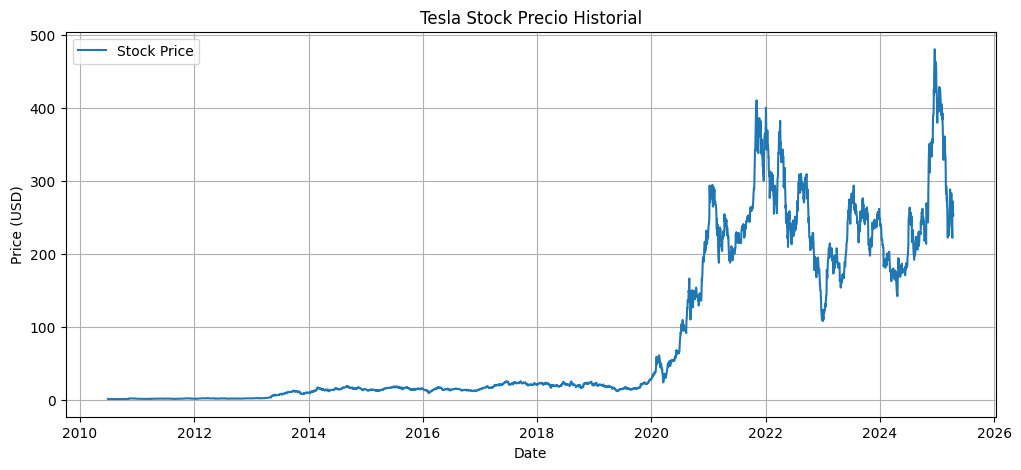

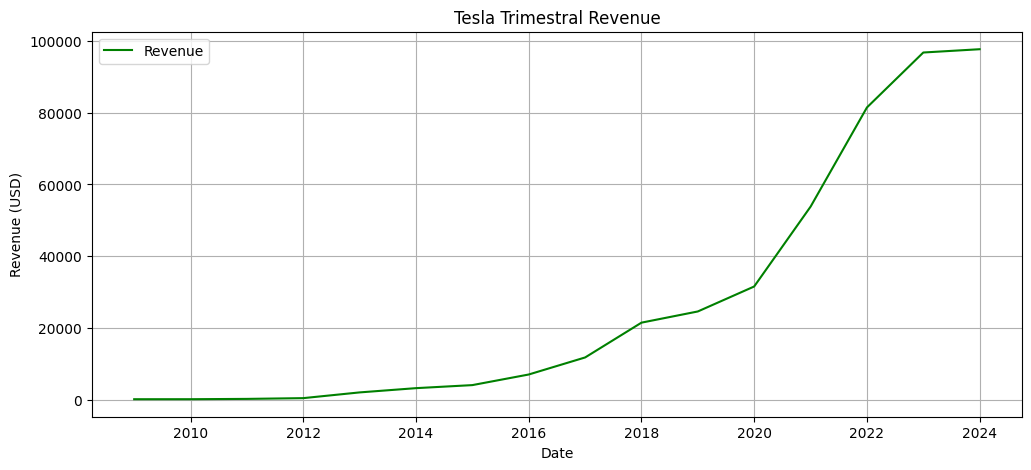

In [10]:
#Pregunta 5: Tablero de acciones e ingresos de Tesla
plt.figure(figsize=(12,5))
plt.plot(tesla_data['Date'], tesla_data['Close'], label='Stock Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Tesla Stock Precio Historial')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12,5))
plt.plot(tesla_revenue['Date'], tesla_revenue['Revenue'], color='green', label='Revenue')
plt.xlabel('Date')
plt.ylabel('Revenue (USD)')
plt.title('Tesla Trimestral Revenue')
plt.legend()
plt.grid(True)
plt.show()

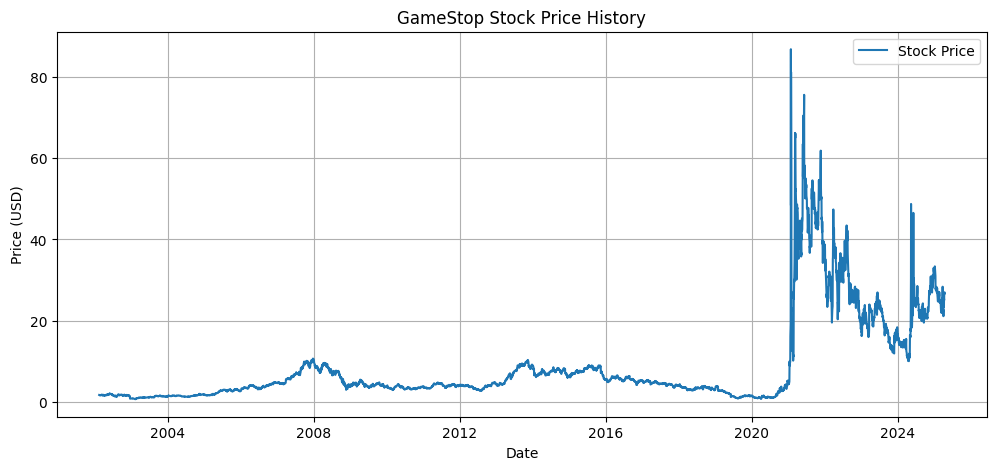

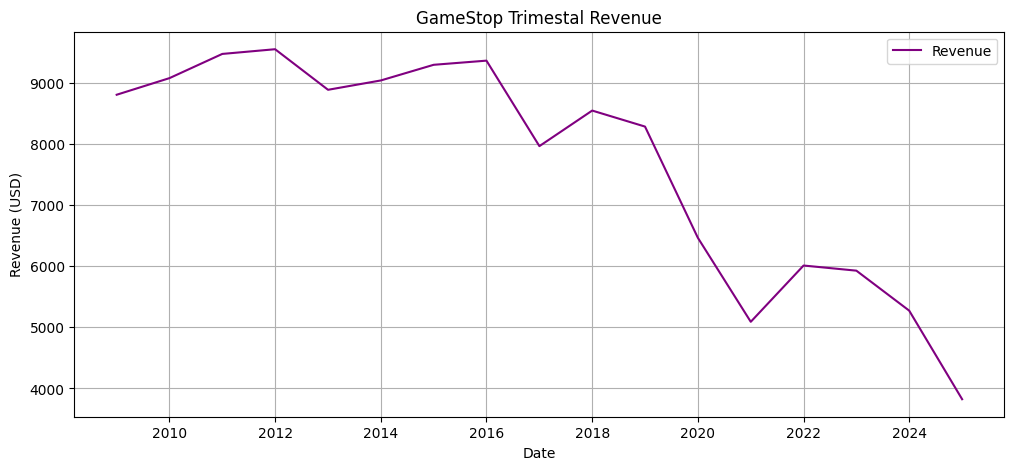

In [11]:
#Pregunta 6: Cuadro de mando de acciones e ingresos de GameStop
plt.figure(figsize=(12,5))
plt.plot(gme_data['Date'], gme_data['Close'], label='Stock Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('GameStop Stock Precio Historial')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12,5))
plt.plot(gme_revenue['Date'], gme_revenue['Revenue'], color='purple', label='Revenue')
plt.xlabel('Date')
plt.ylabel('Revenue (USD)')
plt.title('GameStop Trimestal Revenue')
plt.legend()
plt.grid(True)
plt.show()